In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

In [119]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [120]:
model = RandomForestClassifier(max_depth=8) #RandomForestClassifier(max_depth=4)
calib = CalibratedClassifierCV(model, method='isotonic', cv=3)
calib.fit(X_train, y_train)
y_probs = calib.predict_proba(X_test)[:,1]
y_probs_train = calib.predict_proba(X_train)[:,1]

In [121]:
def complete_plot_roc(y_true, y_probs, ax, threshold_step=0.1):
   
    """
    Run full ROC diagnostic
    """
   
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib.cm import viridis as mycolormap
    import matplotlib as mpl
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs)

    # x axis, y axis
    x = fpr
    y = tpr

    auc = roc_auc_score(y_true, y_probs)
    cmap = plt.get_cmap('viridis', 10)

    # color
    c = thresh
    c[0] = c[0]-1
    c = (c - c.min())/(c.max() - c.min())

    base = 1.0 - threshold_step
    for i in range(len(x)):
        ax.plot(x[i:i+2], y[i:i+2], c=mycolormap(c[i]))

        if thresh[i] <= base:
            ax.scatter(x[i], y[i], color=mycolormap(c[i]))
    #            plt.annotate("  {0:.1f}".format(thresh[i]), (x[i]*1.03, y[i]*0.96), fontsize=8)
            base -= threshold_step

    ax.annotate("AUC = {0:.2f}".format(auc), (0.77, 0.01), fontsize=8,
               bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")


    norm = mpl.colors.Normalize(vmin=0, vmax=1)

    # creating ScalarMappable
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    #plt.colorbar(sm, ticks=np.linspace(0, 2, N))
    plt.colorbar(sm, ax=ax, label="Threshold", orientation="vertical")


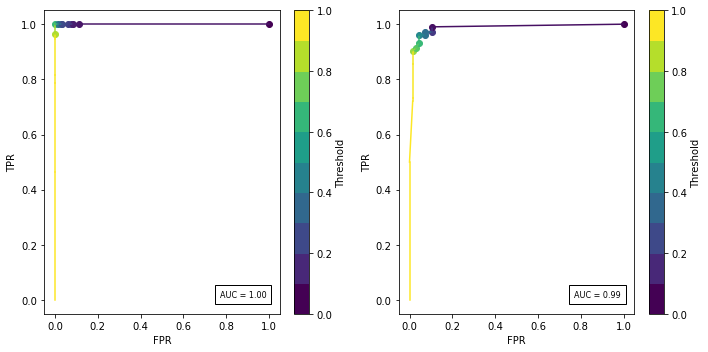

In [122]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

complete_plot_roc(y_train, y_probs_train, ax[0])
complete_plot_roc(y_test, y_probs, ax[1])
plt.tight_layout()
plt.show()